In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
from descartes import PolygonPatch
import pyreadr
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
df = pd.read_csv('BeijingHousePricing_Cleaned.csv', parse_dates=['tradeTime','constructionTime'],index_col= 'id', 
                 dtype={'buildingType' : 'category', 'renovationCondition' : 'category',
                        'buildingStructure' : 'category', 'elevator' : 'category',
                        'fiveYearsProperty' : 'category', 'subway' : 'category',
                        'district' : 'category', 'floorPosition' : 'category'})
pd.set_option('display.float_format', lambda x: '%.3f' % x)

/Users/NancyMao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sf = gpd.read_file('beijing.shp')
sf.NAME_2 = sf.NAME_2.apply(
    lambda x: 'TongZhou' if x == '通州区'
    else ('Shunyi' if x == '顺义区'
          else ('ChangPing' if x == '昌平区'
                else ('DaXing' if x == '大兴区'
                      else ('HuaiRou' if x == '怀柔区'
                           else ('PingGu' if x == '平谷区'
                                else ('MiYun' if x == '密云区'
                                     else ('YanQing' if x == '延庆区'
                                          else ('DongCheng' if x == '东城区'
                                               else ('XiCheng' if x == '西城区'
                                                    else ('ChaoYang' if x == '朝阳区'
                                                         else ('FengTai' if x =='丰台区'
                                                              else ('ShiJingShan' if x == '石景山区'
                                                                   else ('HaiDian' if x == '海淀区'
                                                                       else ('MenTouGou' if x == '门头沟区'
                                                                           else ('FangShan' if x == '房山区'
                                                                                 else x))))))))))))))))

In [4]:
sf_district = sf[['NAME_2', 'geometry']].dissolve(by='NAME_2')
sf_district.reset_index(inplace=True)
sf_district['coords'] = sf_district['geometry'].apply(lambda x: x.representative_point().coords[:])
sf_district['coords'] = [coords[0] for coords in sf_district['coords']]
sf_district.at[3,'coords']=(116.43, 39.88)
sf_district.at[8,'coords']=(116.05, 39.97)
sf_district.at[4,'coords']=(116.1, 39.7)
sf_district.head(15)

,NAME_2,geometry,coords
0,ChangPing,"POLYGON ((116.15231 40.12144, 116.14966 40.120...","(116.17582682011991, 40.21326007700004)"
1,ChaoYang,"MULTIPOLYGON (((116.59192 40.04083, 116.59022 ...","(116.52947746916604, 39.948526347500064)"
2,DaXing,"MULTIPOLYGON (((116.52472 39.59607, 116.52482 ...","(116.46444098641075, 39.636119348500046)"
3,DongCheng,"POLYGON ((116.40125 39.85812, 116.40068 39.858...","(116.43, 39.88)"
4,FangShan,"POLYGON ((116.21317 39.65435, 116.21219 39.652...","(116.1, 39.7)"
5,FengTai,"POLYGON ((116.29151 39.78389, 116.29031 39.786...","(116.24949818542319, 39.82850623400006)"
6,HaiDian,"POLYGON ((116.32866 39.90612, 116.32865 39.906...","(116.24331821695864, 40.022517592500066)"
7,HuaiRou,"POLYGON ((116.70083 40.25538, 116.69871 40.255...","(116.62464490617356, 40.645364785000055)"
8,MenTouGou,"POLYGON ((116.06261 39.86218, 116.06275 39.861...","(116.05, 39.97)"
9,MiYun,"POLYGON ((116.94512 40.25965, 116.94567 40.259...","(116.9512118928189, 40.50908466300007)"


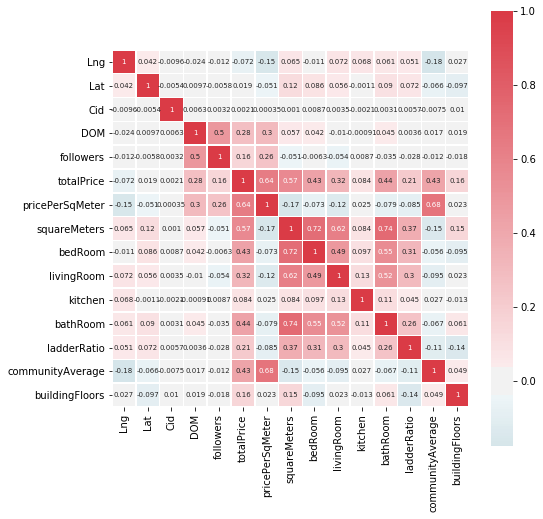

In [5]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, annot=True, annot_kws={"size": 7}, ax=ax)

In [6]:
def get_sub_plot(width = 8, height = 5, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax


def get_sub_plots(n_total_cols, n_cols, fig_lng, fig_hgt, sharey=False):
    n_rows = int(n_total_cols / n_cols)
    if n_total_cols % n_cols != 0:
        n_rows += 1

    fig, axes = plt.subplots(nrows = n_rows, ncols = n_cols,sharey = sharey)
    
    fig.set_size_inches(fig_lng, fig_hgt)  
    
    if n_total_cols % n_cols != 0:
        for col in range(n_total_cols % n_cols, n_cols):
            fig.delaxes(axes[n_rows - 1][col])
            
    axes = axes.flatten()
    
    for ax in axes:
        ax.xaxis.set_major_locator(plt.MaxNLocator(8))

    return (fig, axes)


def plot_map(ax, x ='Lng', y ='Lat'):
    plt.style.use('seaborn-notebook')
    sf_district.boundary.plot(linewidth = 0.5, ax = ax, color = '#5b7c99')
    for idx, row in sf_district.iterrows():
        ax.annotate(s=row['NAME_2'], xy=row['coords'],horizontalalignment='center', fontsize = 9)

    ax.set_xlim([115.966,116.791])
    ax.set_ylim([39.527,40.352])
    
    return ax

def plot_hist_and_cumulative_hist(data, n_cols = 2):
    n_total_cols = 2
    fig, axes = get_sub_plots(n_total_cols, n_cols, fig_lng = 20, fig_hgt =5)
    
    sns.distplot(a = data, ax = axes[0])
    sns.distplot(a = data, hist_kws={'cumulative': True}, kde_kws={'cumulative':True},  ax = axes[1])
    
    axes[0].set_title(label = 'Histogram', fontsize = 14)
    axes[1].set_title(label = 'Cumulative Histogram', fontsize = 14)
    
    fig.tight_layout()    
    plt.show()
    
    
    
def price_scatter_plot_on_map(data, c, ax, x = df['Lng'], y = df['Lat']):
    plot_map(ax=ax)
    points = ax.scatter(x = x, y = y, c = c, cmap = 'YlGnBu', s = 5)
    cbar = plt.colorbar(points,ax=ax, aspect =25, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=9) 

    
def plot_box_and_scatter(x, y, data, hue = None, n_cols = 2, fig_lng = 20, fig_hgt =5):
    n_total_cols = 2
    fig, axes = get_sub_plots(n_total_cols, n_cols, fig_lng = 20, fig_hgt =5)
    
    sns.boxplot(x = x, y = y, hue = hue, data = data, ax = axes[0])
    sns.regplot(x = df[x], y = df[y], ax = axes[1])
    
    fig.tight_layout()    
    plt.show()

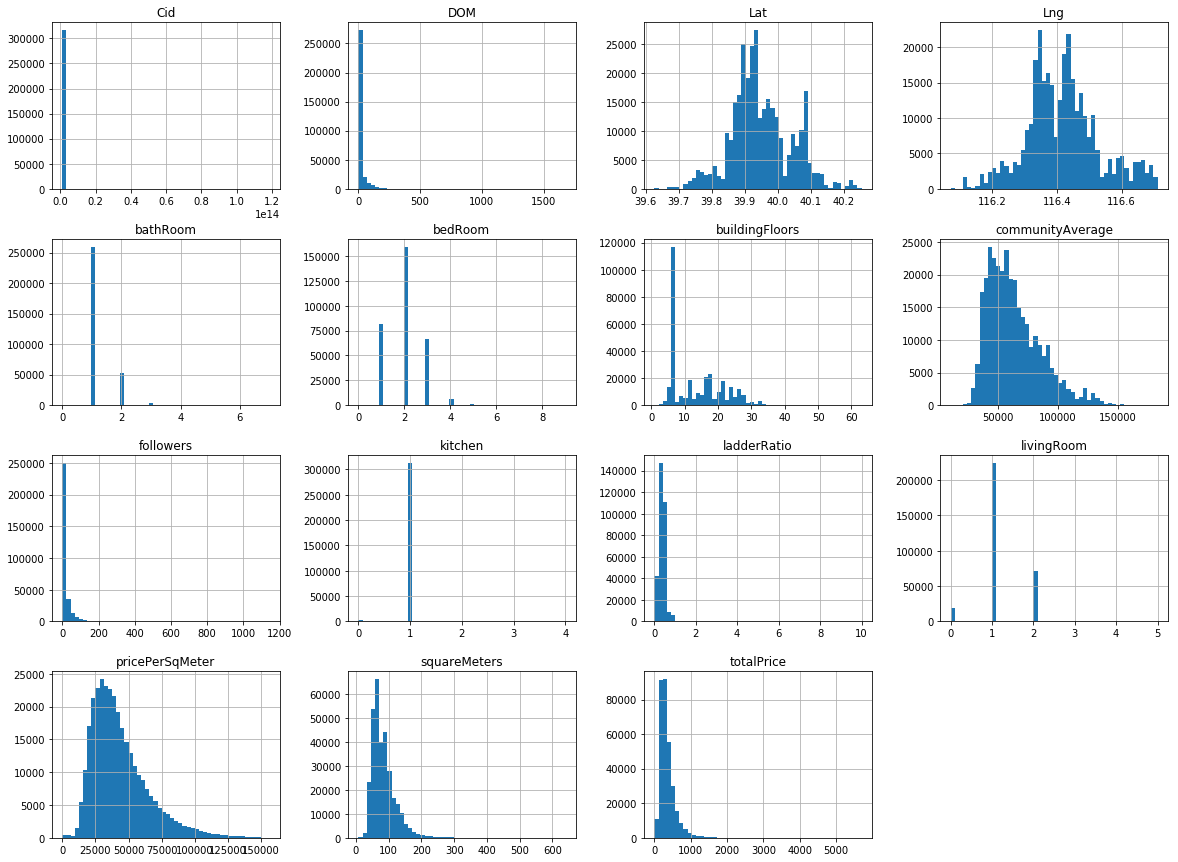

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

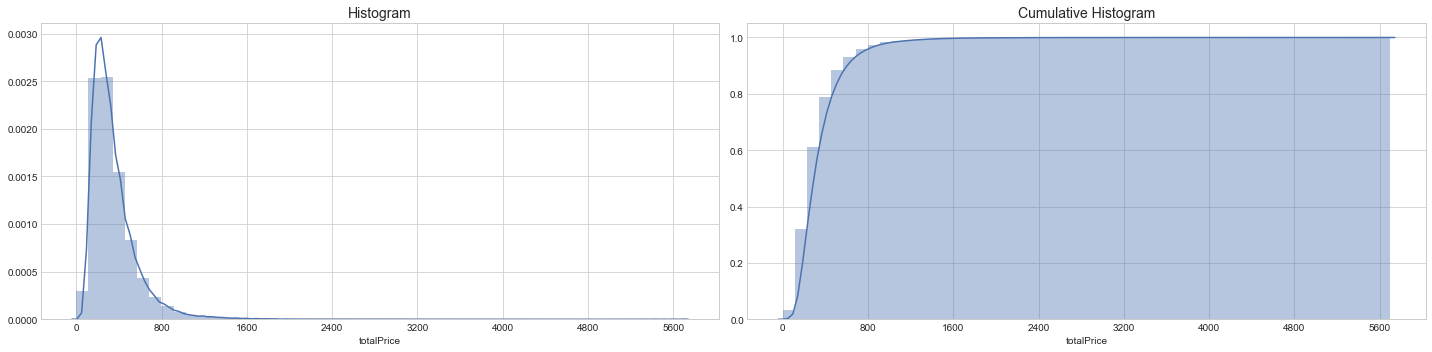

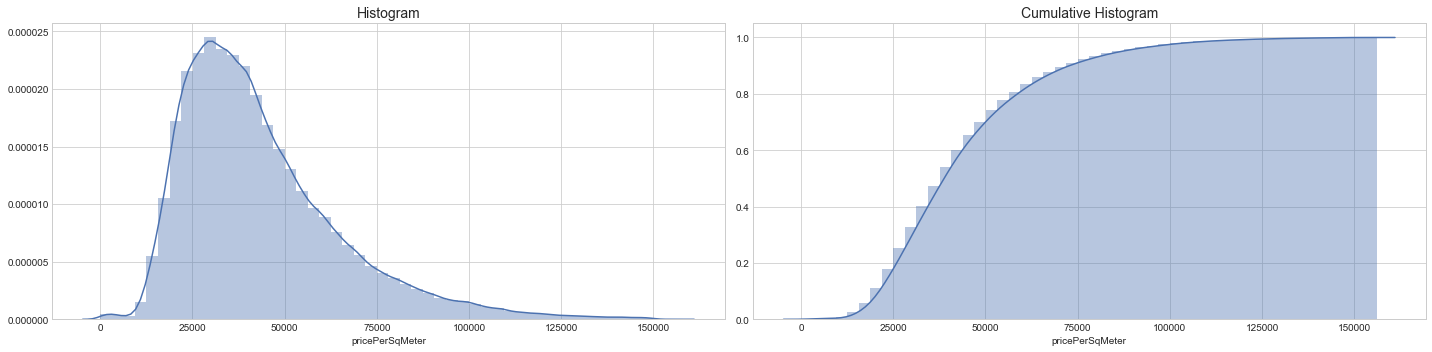

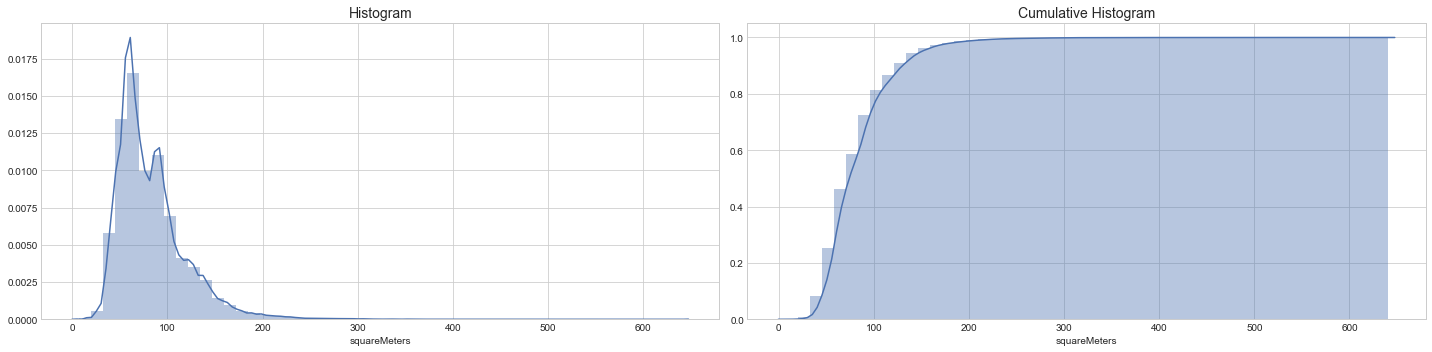

In [8]:
plt.style.use('seaborn-whitegrid')
sns.set_palette("deep")
plot_hist_and_cumulative_hist(data = df['totalPrice'])
plot_hist_and_cumulative_hist(data = df['pricePerSqMeter'])
plot_hist_and_cumulative_hist(data = df['squareMeters'])

In [9]:
price_midian = df.groupby(df['tradeTime'].dt.strftime('%Y-%m'))['pricePerSqMeter'].median()
price_midian_district = df.groupby([df['tradeTime'].dt.strftime('%Y-%m'),'district'])['pricePerSqMeter'].median()
price_midian_district = price_midian_district.unstack(level=-1)

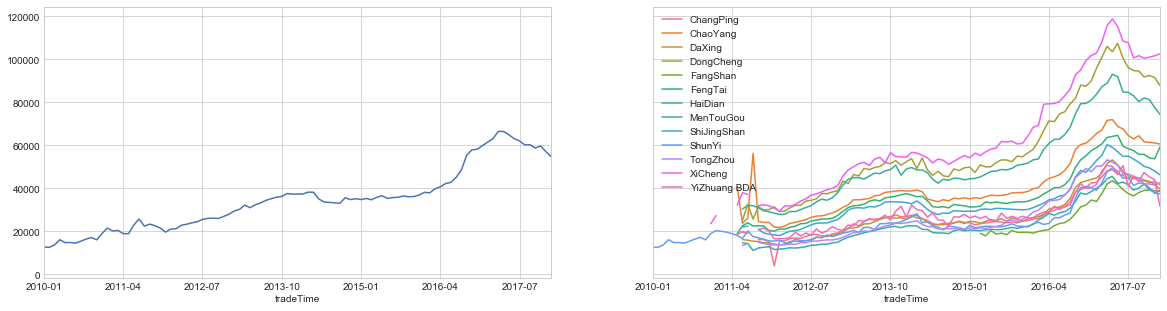

In [10]:
plt.style.use('seaborn-whitegrid')
NUM_COLORS = len(price_midian_district.columns)

cm = ListedColormap(sns.color_palette("husl", 13))
fig, axes = get_sub_plots(n_total_cols = 2, n_cols =2, fig_lng = 20, fig_hgt =5, sharey = True) 

axes[1].set_prop_cycle('color',[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
price_midian_district.plot(ax=axes[1])

price_midian.plot(ax=axes[0])


plt.legend()
plt.show()

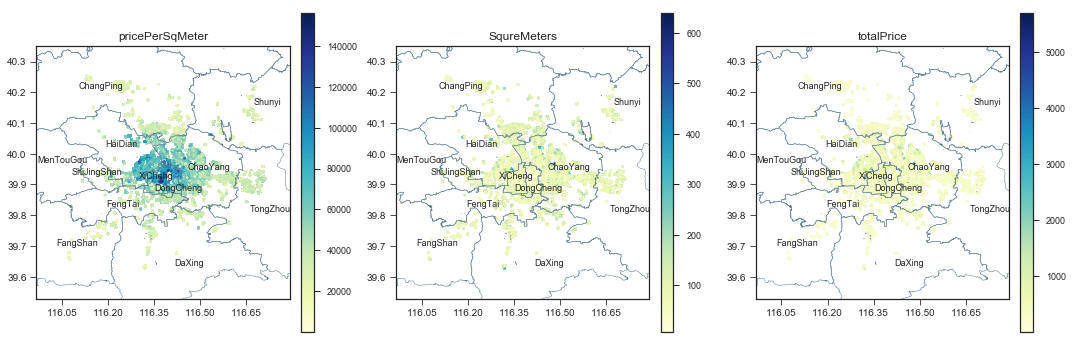

In [11]:
plt.style.use('seaborn-ticks')
fig, axes = get_sub_plots(n_total_cols = 3, n_cols =3, fig_lng = 15, fig_hgt =5)
price_scatter_plot_on_map(data = df, c =df['pricePerSqMeter'], ax = axes[0])
price_scatter_plot_on_map(data = df, c =df['squareMeters'], ax = axes[1])
price_scatter_plot_on_map(data = df, c =df['totalPrice'], ax = axes[2])

axes[0].title.set_text('pricePerSqMeter')
axes[1].title.set_text('SqureMeters')
axes[2].title.set_text('totalPrice')

plt.tight_layout()
plt.show()

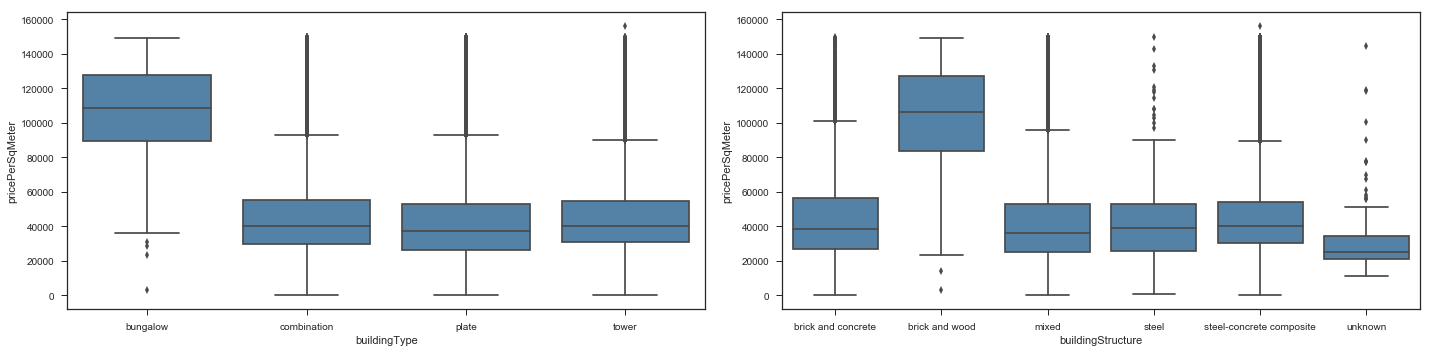

In [12]:
plt.style.use('seaborn-ticks')
fig, axes = get_sub_plots(n_total_cols = 2, n_cols =2, fig_lng = 20, fig_hgt =5)

sns.boxplot(x = 'buildingType', y = 'pricePerSqMeter', data = df, ax=axes[0], color = 'steelblue')
sns.boxplot(x = 'buildingStructure', y = 'pricePerSqMeter', data = df, ax=axes[1], color = 'steelblue')

fig.tight_layout()
plt.show()

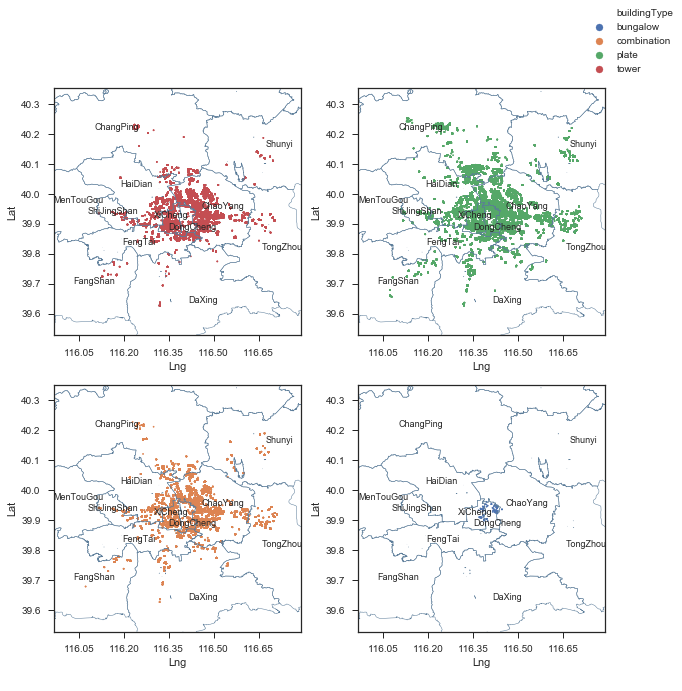

In [13]:
plt.style.use('seaborn-ticks')
labels = list(df.buildingType.unique())
n = len(labels)

fig, axes = get_sub_plots(n_total_cols = n, n_cols =2, fig_lng = 10, fig_hgt =10)

for ax, label in zip(axes.flatten(), labels):
    plot_map(ax=ax)
    data = df[df.buildingType == label]
    sns.scatterplot(data=data, ax = ax, x='Lng', y ='Lat', hue='buildingType', edgecolor=None, s=1)
    handles, lbls = ax.get_legend_handles_labels()
    ax.legend_.remove()

fig.legend(handles, lbls, loc='upper right')
plt.show()


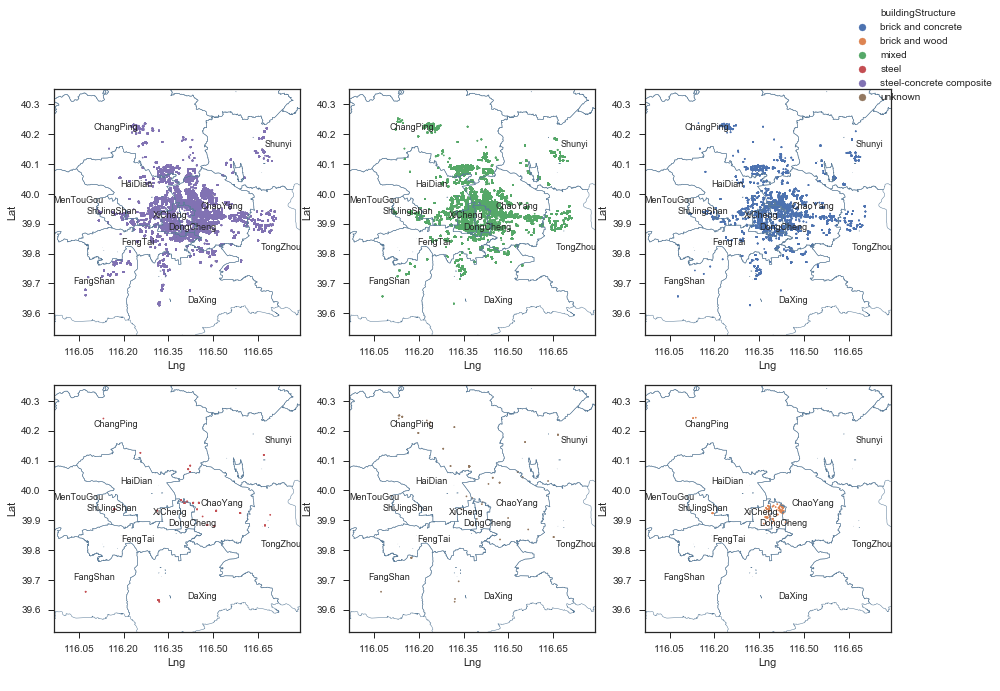

In [14]:
labels = list(df.buildingStructure.unique())
n = len(labels)

fig, axes = get_sub_plots(n_total_cols = n, n_cols =3, fig_lng = 15, fig_hgt =10)

for ax, label in zip(axes.flatten(), labels):
    plot_map(ax=ax)
    data = df[df.buildingStructure == label]
    sns.scatterplot(data=data, ax = ax, x='Lng', y ='Lat', hue='buildingStructure', edgecolor=None, s=1)
    handles, lbls = ax.get_legend_handles_labels()
    ax.legend_.remove()

fig.legend(handles, lbls, loc='upper right')
plt.show()

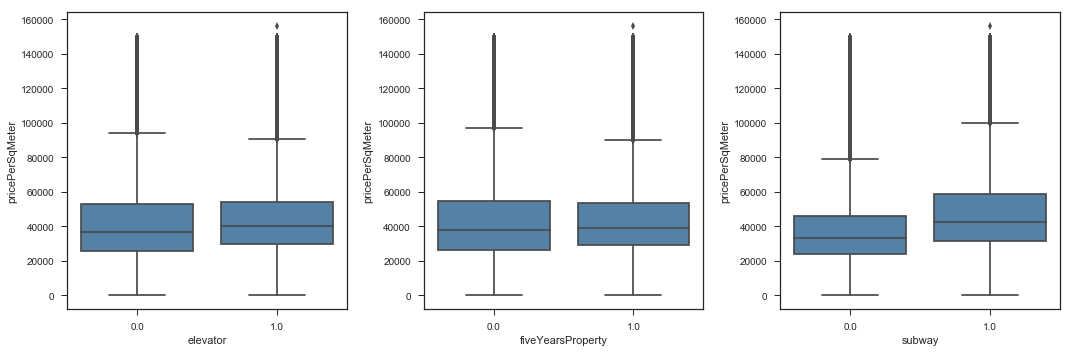

In [15]:
plt.style.use('seaborn-ticks')
fig, axes = get_sub_plots(n_total_cols = 3, n_cols =3, fig_lng = 15, fig_hgt =5)

sns.boxplot(x = 'elevator', y = 'pricePerSqMeter', data = df, ax=axes[0], color = 'steelblue')
sns.boxplot(x = 'fiveYearsProperty', y = 'pricePerSqMeter', data= df, ax=axes[1], color = 'steelblue')
sns.boxplot(x = 'subway', y = 'pricePerSqMeter', data = df, ax=axes[2], color = 'steelblue')

fig.tight_layout()
plt.show()

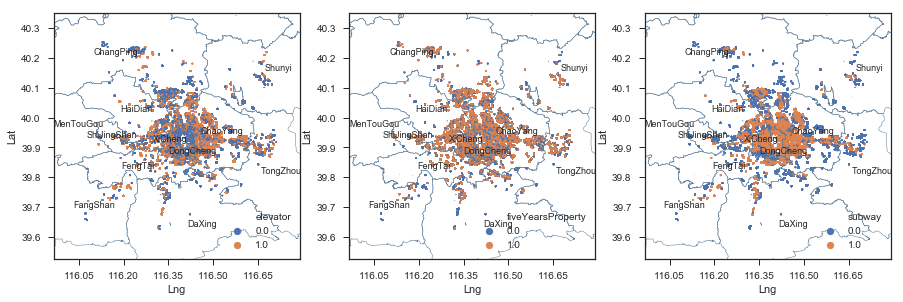

In [16]:
fig, axes = get_sub_plots(n_total_cols = 3, n_cols =3, fig_lng = 15, fig_hgt =5)

plot_map(ax=axes[0])
sns.scatterplot(data=df, ax = axes[0], x='Lng', y ='Lat', hue='elevator', edgecolor=None, s=1)

plot_map(ax=axes[1])
sns.scatterplot(data=df, ax = axes[1], x='Lng', y ='Lat', hue='fiveYearsProperty', edgecolor=None, s=1)

plot_map(ax=axes[2])
sns.scatterplot(data=df, ax = axes[2], x='Lng', y ='Lat', hue='subway', edgecolor=None, s=1)

plt.show()